In [4]:
import snpy
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import glob
from peakutils import peak

from multiprocessing import Pool

%config InlineBackend.figure_format = 'retina'
print(f'SNooPy version: v{snpy.__version__}')

SNOOPY_MODEL = 'EBV_model2'
DATA_DIR = 'csp_data'
PROCESSES = 8

SNooPy version: v2.6.0


--------------------------------------------------------------------------------
SN  SN2004eo
z = 0.0157          zcmb = 0.0147          ra=308.22580         dec=  9.92850 
Data in the following bands: g,  r,  i,  u,  B,  V,  J,  H,  K,  Y,  
Fit results (if any):
   DM = 33.804  +/-  0.020  +/- 0.087 (sys)
   st = 0.817  +/-  0.009  +/- 0.030 (sys)
   EBVhost = 0.154  +/-  0.012  +/- 0.060 (sys)
   Tmax = 53278.743  +/-  0.073  +/- 0.340 (sys)
None


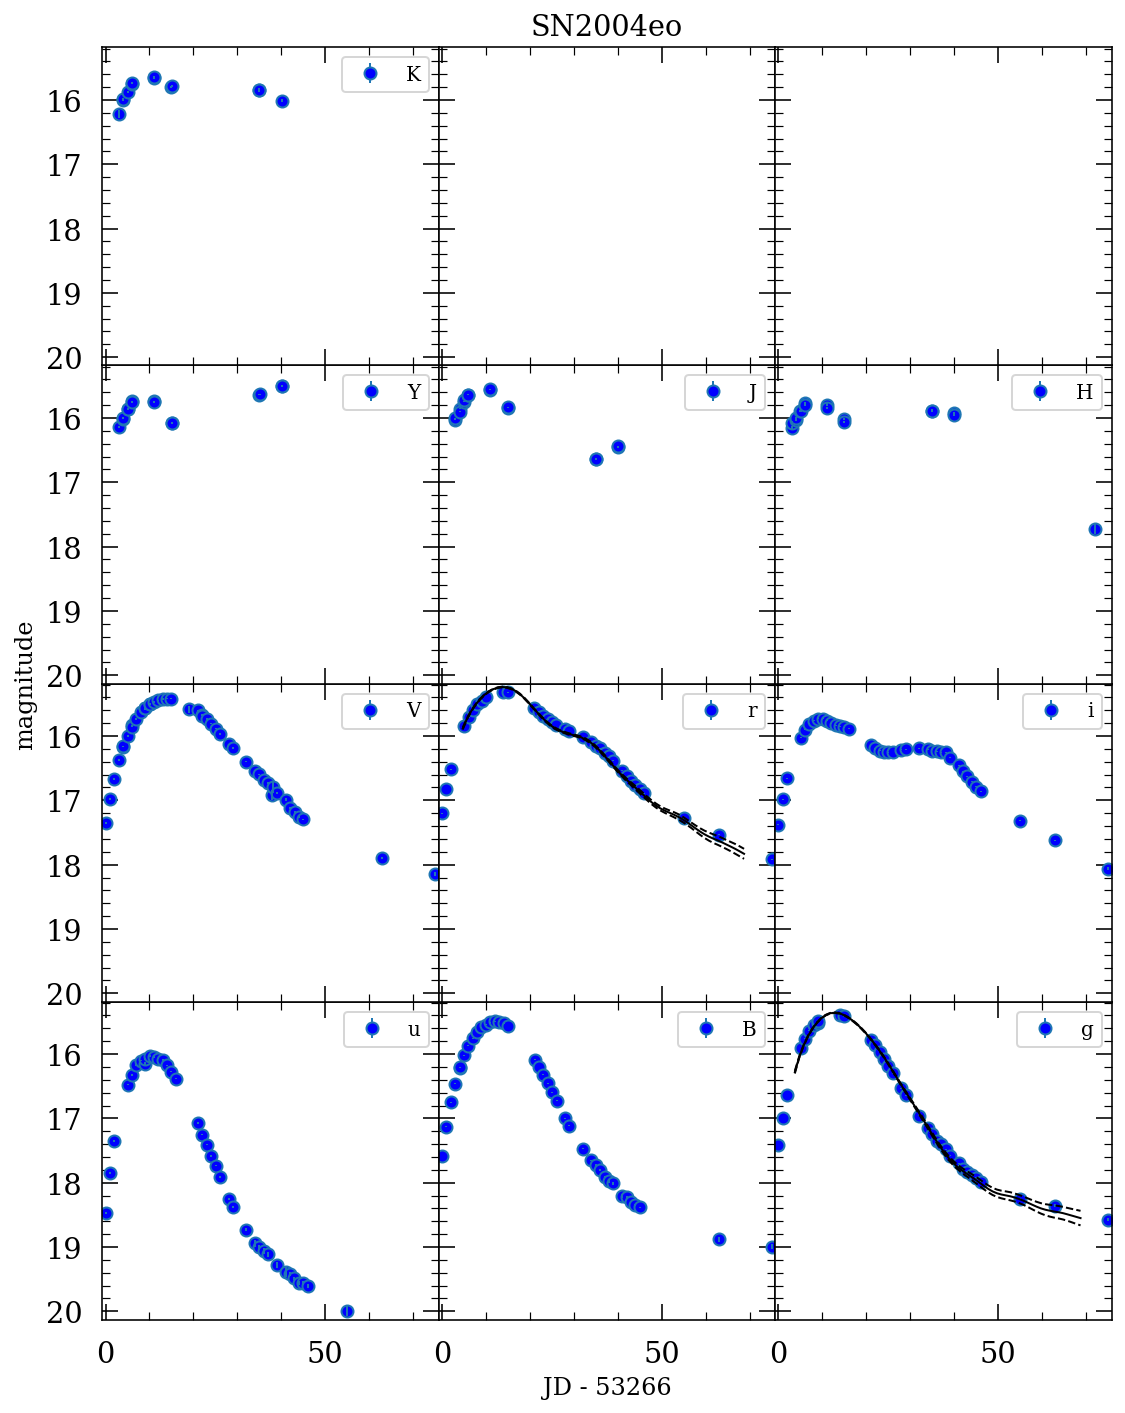

In [2]:
sn_name = 'SN2004eo'
sn_file = os.path.join(DATA_DIR, f'{sn_name}_snpy.txt')
sn = snpy.import_lc(sn_file)
            
sn.choose_model(SNOOPY_MODEL)

sn.fit(['g', 'r'])
print(sn.summary())

--------------------------------------------------------------------------------
SN  SN2004eo
z = 0.0157          zcmb = 0.0147          ra=308.22580         dec=  9.92850 
Data in the following bands: g,  r,  i,  u,  B,  V,  J,  H,  K,  Y,  
Fit results (if any):
   DM = 33.870  +/-  0.011  +/- 0.092 (sys)
   st = 0.796  +/-  0.005  +/- 0.030 (sys)
   EBVhost = 0.095  +/-  0.007  +/- 0.060 (sys)
   Tmax = 53278.676  +/-  0.048  +/- 0.340 (sys)
None
--------------------------------------------------------------------------------
SN  SN2004eo
z = 0.0157          zcmb = 0.0147          ra=308.22580         dec=  9.92850 
Data in the following bands: g,  r,  i,  u,  B,  V,  J,  H,  K,  Y,  
Fit results (if any):
   DM = 33.804  +/-  0.020  +/- 0.087 (sys)
   st = 0.817  +/-  0.009  +/- 0.030 (sys)
   EBVhost = 0.154  +/-  0.012  +/- 0.060 (sys)
   Tmax = 53278.743  +/-  0.073  +/- 0.340 (sys)
None


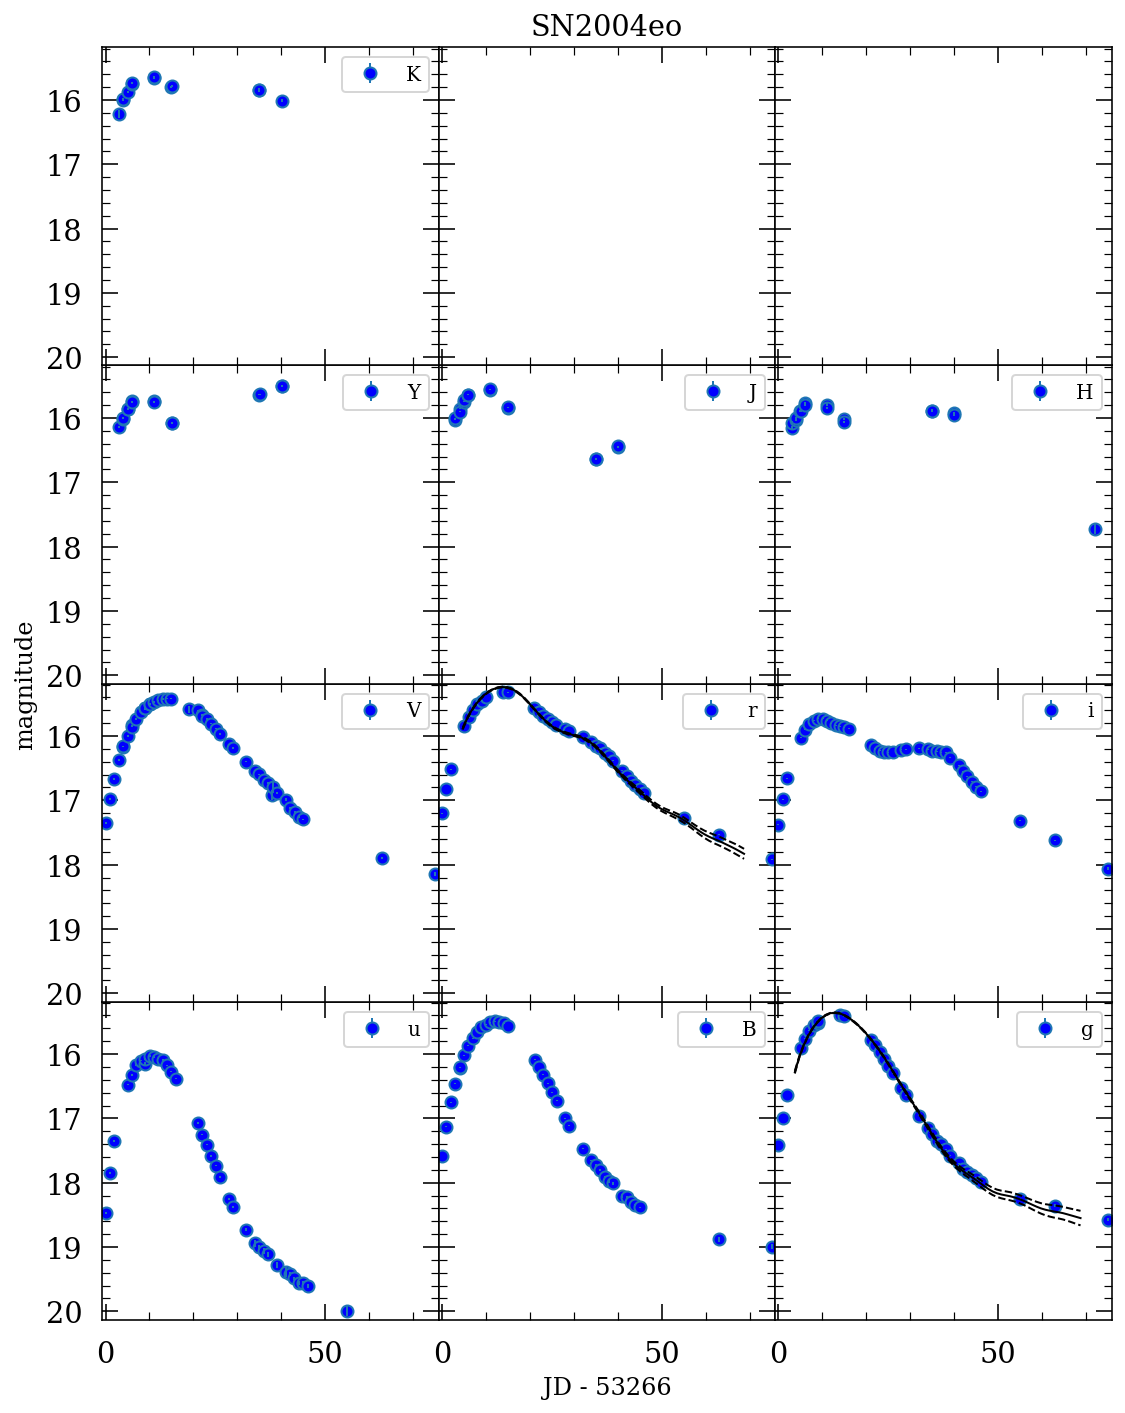

In [5]:
sn_name = 'SN2004eo'
sn_file = os.path.join(DATA_DIR, f'{sn_name}_snpy.txt')
sn2 = snpy.import_lc(sn_file)

sn2.choose_model(SNOOPY_MODEL)
copy_sn2 = copy.deepcopy(sn2)

sn2.fit()
print(sn2.summary())
copy_sn2.fit(['g', 'r'])
print(copy_sn2.summary())

___

--------------------------------------------------------------------------------
SN  SN2004eo
z = 0.0157          zcmb = 0.0147          ra=308.22580         dec=  9.92850 
Data in the following bands: g,  r,  i,  u,  B,  V,  J,  H,  K,  Y,  
Fit results (if any):
   st = 0.818  +/-  0.007  +/- 0.030 (sys)
   Tmax = 53278.740  +/-  0.060  +/- 0.340 (sys)
   gmax = 15.035  +/-  0.008  +/- 0.014 (sys)
   rmax = 15.028  +/-  0.007  +/- 0.022 (sys)
   Jmax = 15.461  +/-  0.112  +/- 0.044 (sys)
   Hmax = 15.706  +/-  0.164  +/- 0.055 (sys)


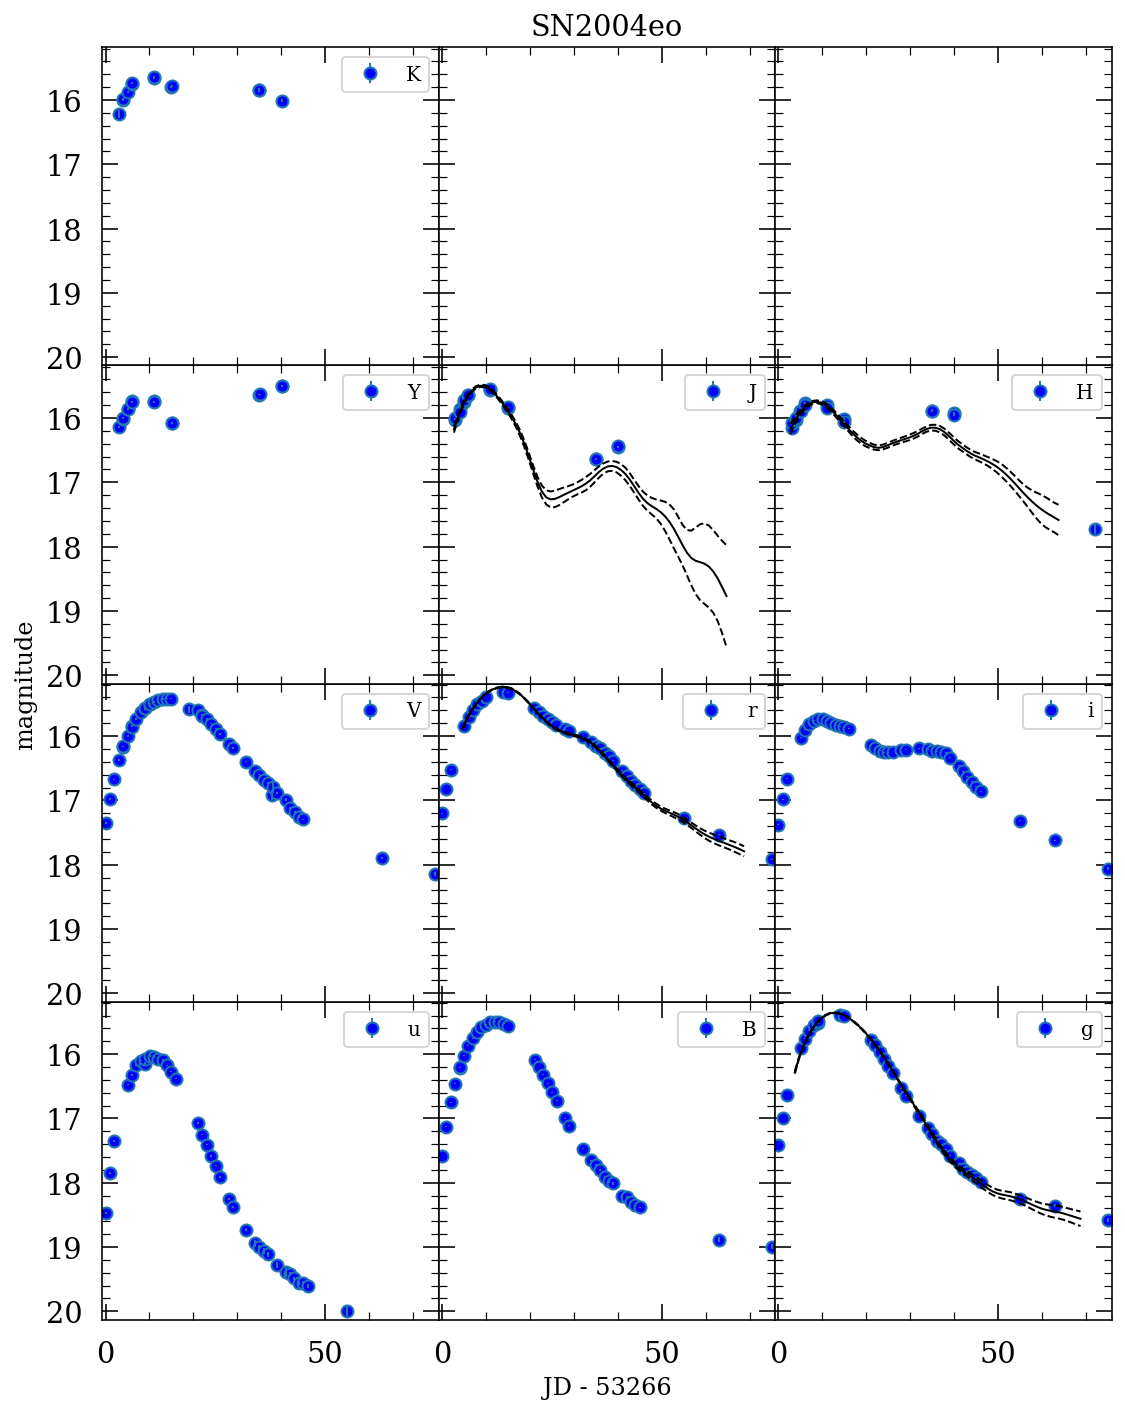

In [33]:
sn_name = 'SN2004eo'
sn_file = os.path.join(DATA_DIR, f'{sn_name}_snpy.txt')
sn3 = snpy.import_lc(sn_file)
sn3.choose_model('max_model')

for band in ['J', 'H']:
    mask = [False for val in sn3.data[band].mask]
    mask[3] = True
    sn3.data[band].__dict__['mask'] = mask
    
sn3.fit(['g', 'r', 'J', 'H'])
sn3.summary()

--------------------------------------------------------------------------------
SN  SN2004eo
z = 0.0157          zcmb = 0.0147          ra=308.22580         dec=  9.92850 
Data in the following bands: g,  r,  i,  u,  B,  V,  J,  H,  K,  Y,  
Fit results (if any):
   st = 0.818  +/-  0.009  +/- 0.030 (sys)
   Tmax = 53278.740  +/-  0.073  +/- 0.340 (sys)
   gmax = 15.035  +/-  0.010  +/- 0.014 (sys)
   rmax = 15.028  +/-  0.008  +/- 0.022 (sys)
   Jmax = 15.462  +/-  0.135  +/- 0.044 (sys)
   Hmax = 15.706  +/-  0.198  +/- 0.055 (sys)


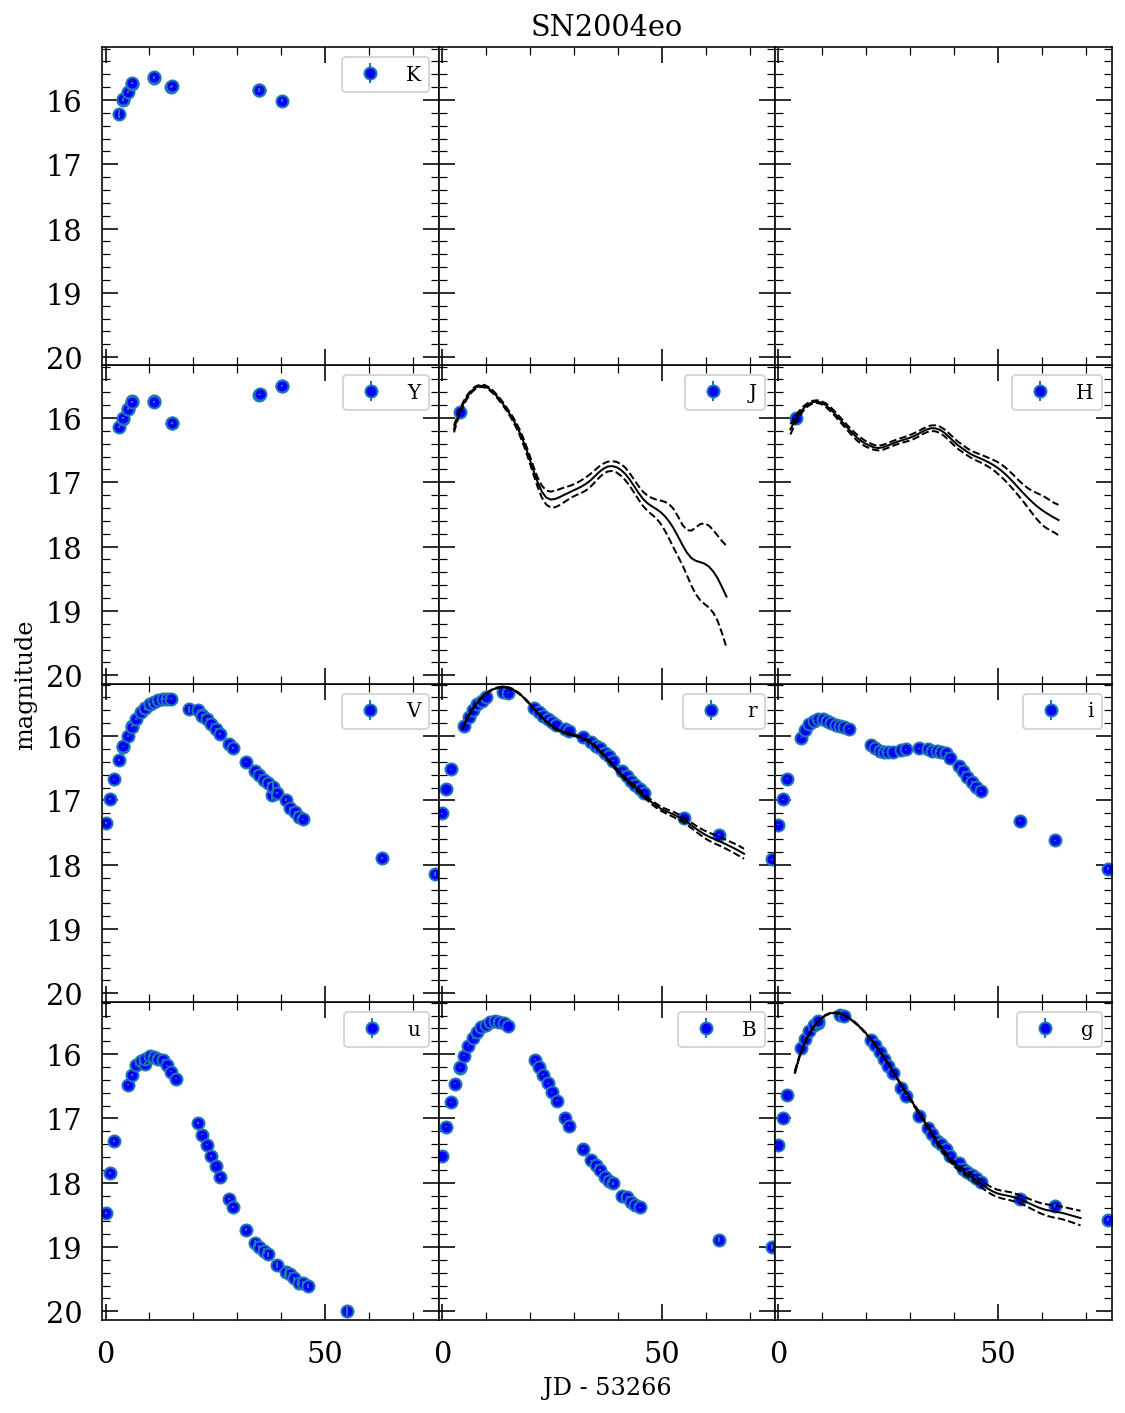

In [45]:
# this is the ideal way of changinf things in a SN object
sn_name = 'SN2004eo'
sn_file = os.path.join(DATA_DIR, f'{sn_name}_snpy.txt')
sn4 = snpy.import_lc(sn_file)
sn4.choose_model('max_model')

ind = 3
for band in ['J', 'H']:
    sn4.data[band].MJD = np.array([sn4.data[band].MJD[ind]])
    sn4.data[band].magnitude = np.array([sn4.data[band].magnitude[ind]])
    sn4.data[band].e_mag = np.array([sn4.data[band].e_mag[ind]])

    sn4.data[band].sids = [0]
    sn4.data[band].__dict__['mask'] = [True]
    
sn4.fit(['g', 'r', 'J', 'H'])
sn4.summary()

--------------------------------------------------------------------------------
SN  SN2004eo
z = 0.0157          zcmb = 0.0147          ra=308.22580         dec=  9.92850 
Data in the following bands: g,  r,  i,  u,  B,  V,  J,  H,  K,  Y,  
Fit results (if any):
   st = 0.818  +/-  0.007  +/- 0.030 (sys)
   Tmax = 53278.740  +/-  0.060  +/- 0.340 (sys)
   gmax = 15.035  +/-  0.008  +/- 0.014 (sys)
   rmax = 15.028  +/-  0.007  +/- 0.022 (sys)
   Jmax = 15.462  +/-  0.031  +/- 0.044 (sys)
   Hmax = 15.706  +/-  0.041  +/- 0.055 (sys)


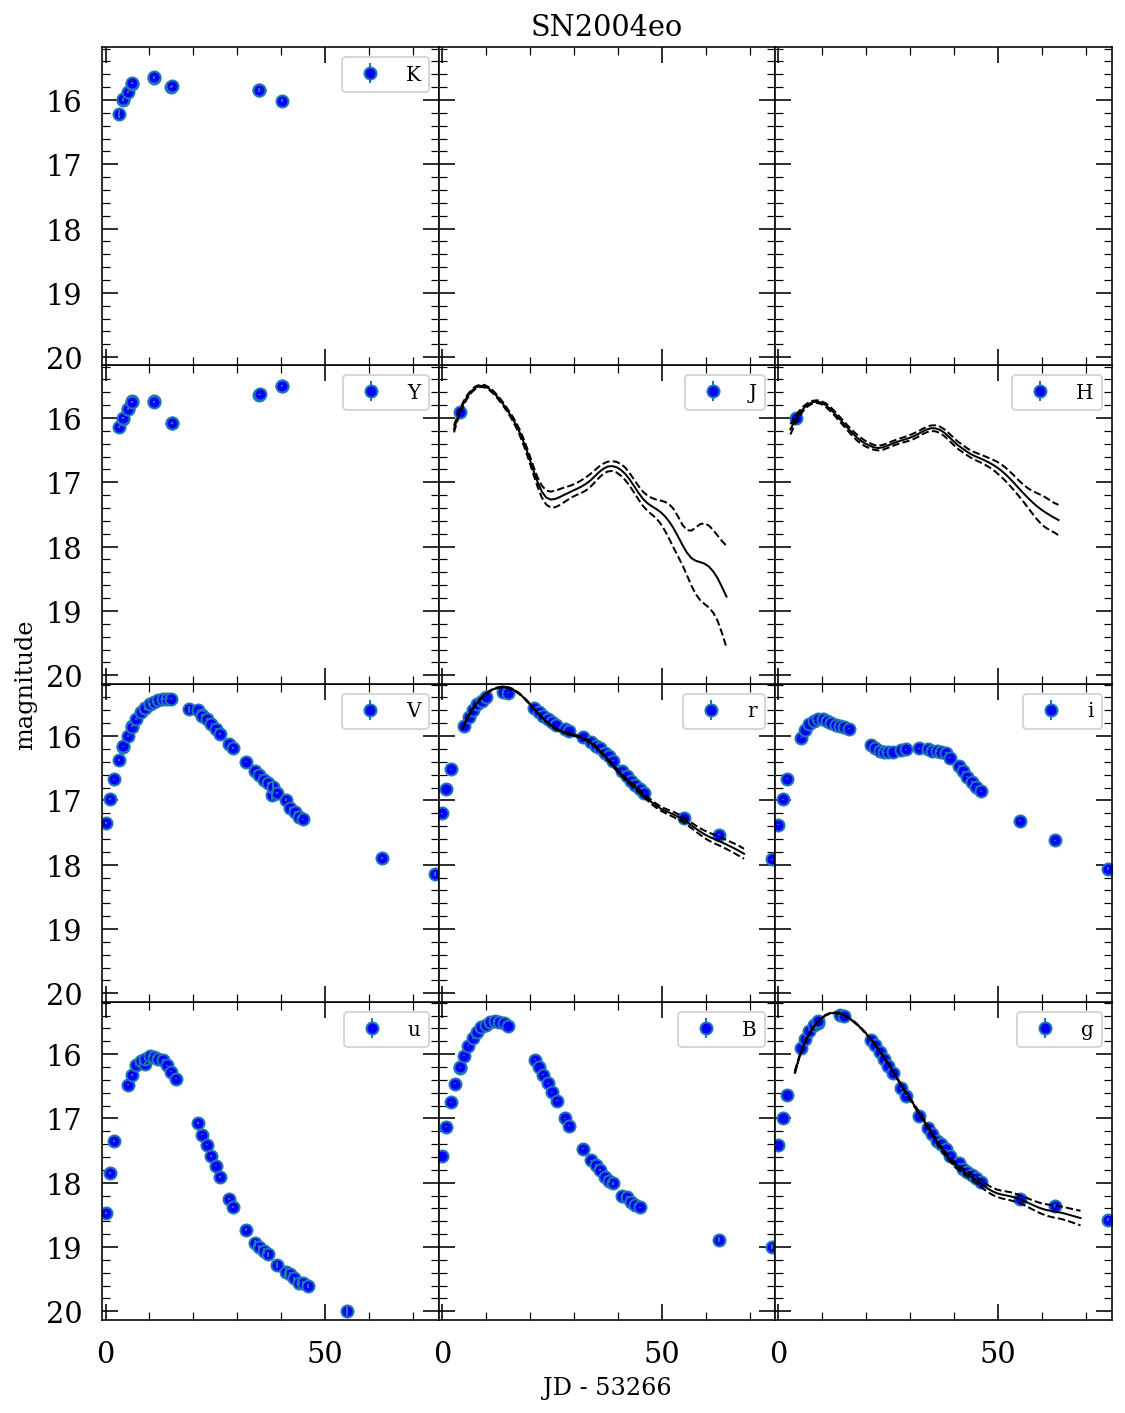

In [51]:
# this is the ideal way of changinf things in a SN object
sn_name = 'SN2004eo'
sn_file = os.path.join(DATA_DIR, f'{sn_name}_snpy.txt')
sn7 = snpy.import_lc(sn_file)
sn7.choose_model('max_model')


for band in ['J', 'H']:
    mask = len(sn7.data[band].MJD)*[False]
    mask[3] = True

    sn7.data[band].MJD = sn7.data[band].MJD[mask]
    sn7.data[band].magnitude = sn7.data[band].magnitude[mask]
    sn7.data[band].e_mag = sn7.data[band].e_mag[mask]

    sn7.data[band].sids = [0]*len(sn7.data[band].MJD)
    sn7.data[band].__dict__['mask'] = [True]*len(sn7.data[band].MJD)
    
sn7.fit(['g', 'r', 'J', 'H'])
sn7.summary()

--------------------------------------------------------------------------------
SN  SN2004eo
z = 0.0157          zcmb = 0.0147          ra=308.22580         dec=  9.92850 
Data in the following bands: g,  r,  i,  u,  B,  V,  J,  H,  K,  Y,  
Fit results (if any):
   st = 0.818  +/-  0.008  +/- 0.030 (sys)
   Tmax = 53278.751  +/-  0.063  +/- 0.340 (sys)
   gmax = 15.036  +/-  0.009  +/- 0.014 (sys)
   rmax = 15.028  +/-  0.007  +/- 0.022 (sys)
   Jmax = 15.422  +/-  0.028  +/- 0.044 (sys)
   Hmax = 15.612  +/-  0.038  +/- 0.055 (sys)
None
--------------------------------------------------------------------------------
SN  SN2004eo
z = 0.0157          zcmb = 0.0147          ra=308.22580         dec=  9.92850 
Data in the following bands: g,  r,  i,  u,  B,  V,  J,  H,  K,  Y,  
Fit results (if any):
   st = 0.818  +/-  0.009  +/- 0.030 (sys)
   Tmax = 53278.740  +/-  0.073  +/- 0.340 (sys)
   gmax = 15.035  +/-  0.010  +/- 0.014 (sys)
   rmax = 15.028  +/-  0.008  +/- 0.022 (sys)
   Jm

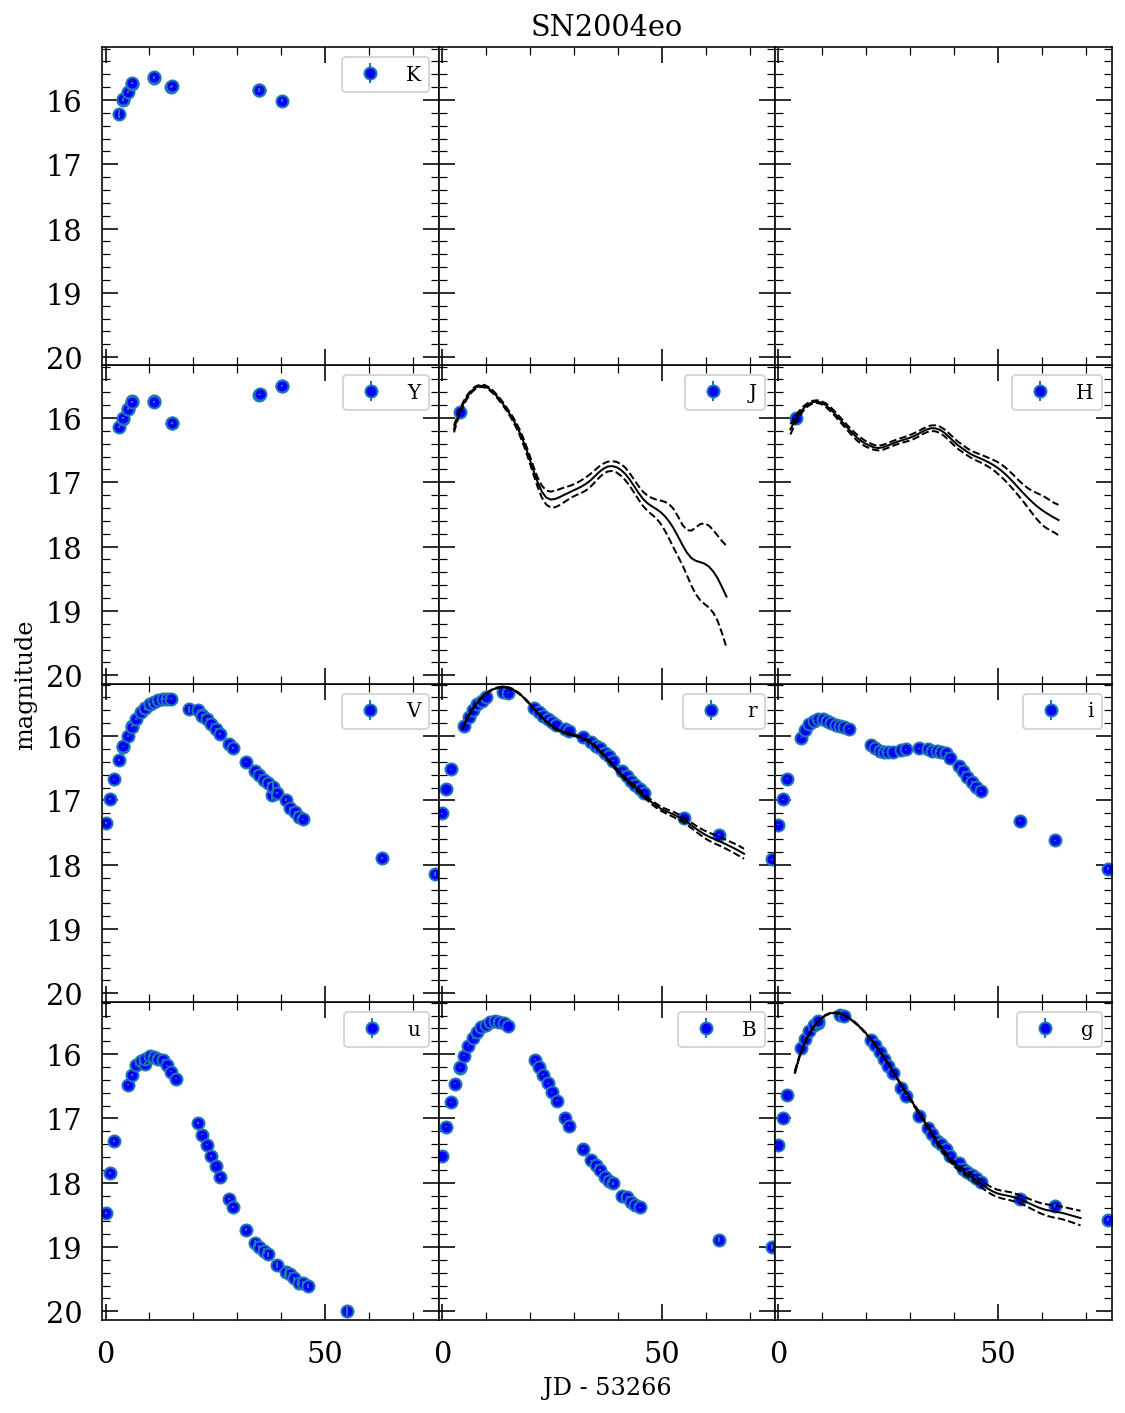

In [54]:
# this is the ideal way of changinf things in a SN object
sn_name = 'SN2004eo'
sn_file = os.path.join(DATA_DIR, f'{sn_name}_snpy.txt')
sn7 = snpy.import_lc(sn_file)
sn7.choose_model('max_model')

sn_copy = copy.deepcopy(sn7)

sn7.fit(['g', 'r', 'J', 'H'])
print(sn7.summary())

for band in ['J', 'H']:
    mask = len(sn_copy.data[band].MJD)*[False]
    mask[3] = True

    sn_copy.data[band].MJD = sn_copy.data[band].MJD[mask]
    sn_copy.data[band].magnitude = sn_copy.data[band].magnitude[mask]
    sn_copy.data[band].e_mag = sn_copy.data[band].e_mag[mask]

    sn_copy.data[band].sids = [0]*len(sn_copy.data[band].MJD)
    sn_copy.data[band].__dict__['mask'] = [True]*len(sn_copy.data[band].MJD)
    
sn_copy.fit(['g', 'r', 'J', 'H'])
sn_copy.summary()

--------------------------------------------------------------------------------
SN  SN2004eo
z = 0.0157          zcmb = 0.0147          ra=308.22580         dec=  9.92850 
Data in the following bands: g,  r,  i,  u,  B,  V,  J,  H,  K,  Y,  
Fit results (if any):
   st = 0.818  +/-  0.008  +/- 0.030 (sys)
   Tmax = 53278.751  +/-  0.063  +/- 0.340 (sys)
   gmax = 15.036  +/-  0.009  +/- 0.014 (sys)
   rmax = 15.028  +/-  0.007  +/- 0.022 (sys)
   Jmax = 15.422  +/-  0.028  +/- 0.044 (sys)
   Hmax = 15.612  +/-  0.038  +/- 0.055 (sys)
None
--------------------------------------------------------------------------------
SN  SN2004eo
z = 0.0157          zcmb = 0.0147          ra=308.22580         dec=  9.92850 
Data in the following bands: g,  r,  i,  u,  B,  V,  J,  H,  K,  Y,  
Fit results (if any):
   st = 0.818  +/-  0.007  +/- 0.030 (sys)
   Tmax = 53278.740  +/-  0.060  +/- 0.340 (sys)
   gmax = 15.035  +/-  0.008  +/- 0.014 (sys)
   rmax = 15.028  +/-  0.007  +/- 0.022 (sys)
   Jm

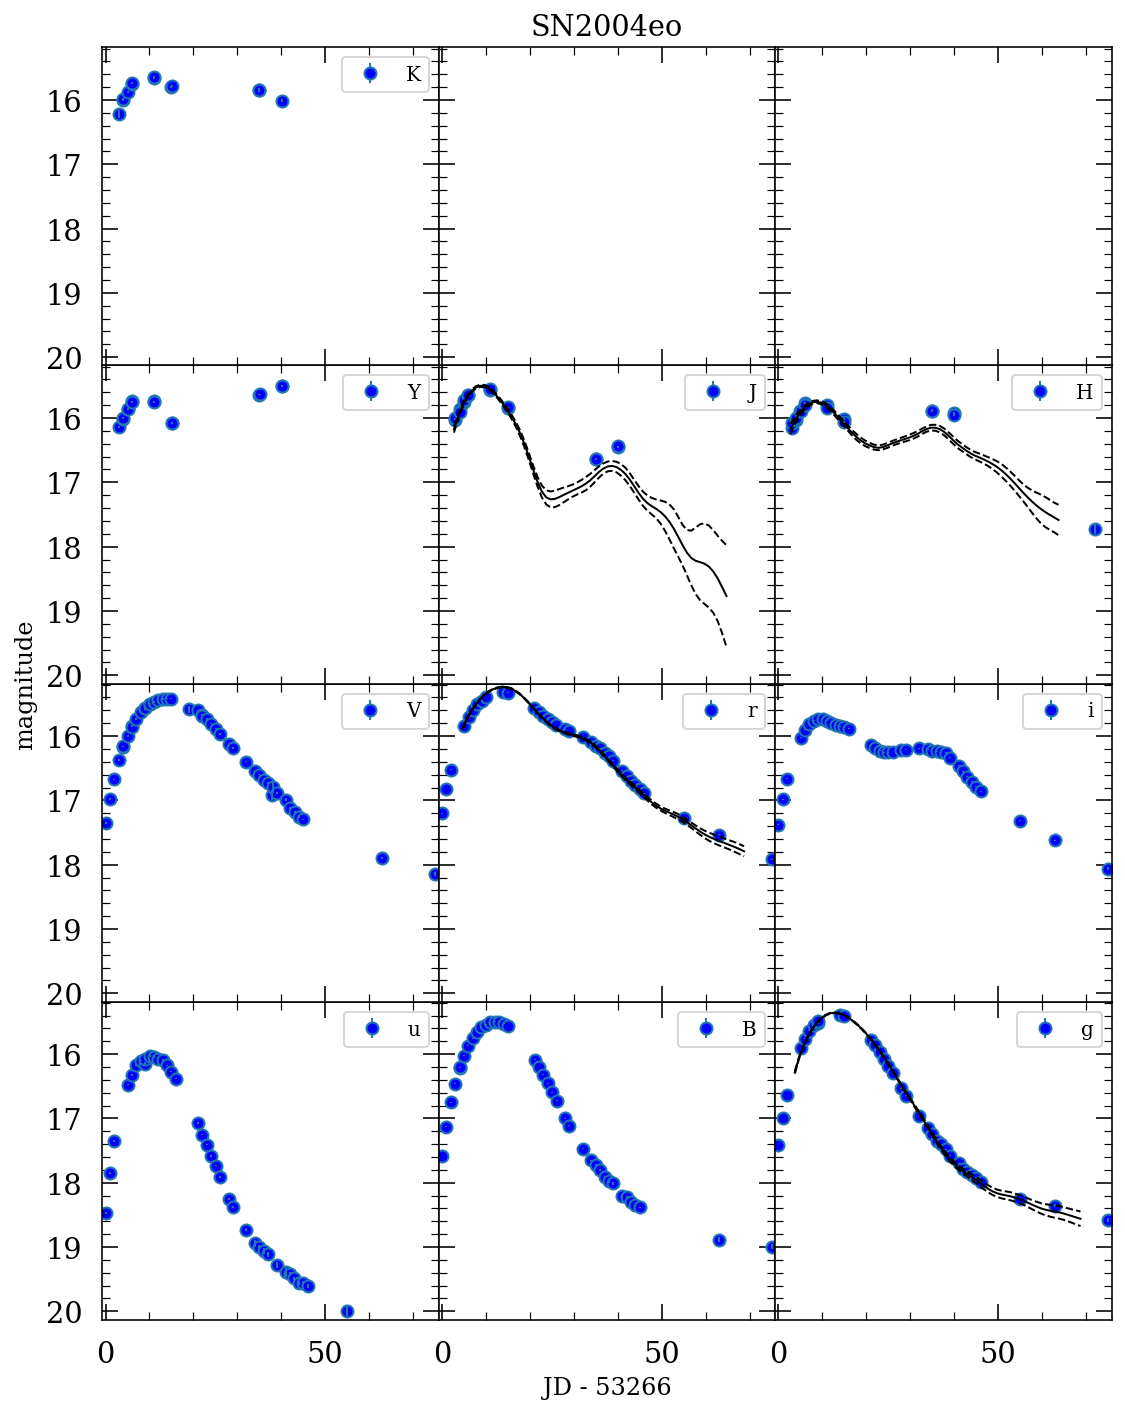

In [32]:
sn_name = 'SN2004eo'
sn_file = os.path.join(DATA_DIR, f'{sn_name}_snpy.txt')
sn6 = snpy.import_lc(sn_file)
sn6.choose_model('max_model')

sn6.fit(['g', 'r', 'J', 'H'])
print(sn6.summary())

sn6 = snpy.import_lc(sn_file)
sn6.choose_model('max_model')
for band in ['J', 'H']:
    mask = [False for val in sn6.data[band].mask]
    mask[3] = True
    sn6.data[band].__dict__['mask'] = mask
    
sn6.fit(['g', 'r', 'J', 'H'])
sn6.summary()